# **Convolutional Neural Network Simplified (Dog/Cat Recognition)**

## **Goals of the project -**
* To understand the basic implemetation of the CNN
* To build the CNN layer by layer and understanding the significance of each layer and the arguments used
* Performing operations like Convolutional, MaxPooling, Flatten, etc
* Understanding the concepts of vector in Flattening and Full Connection
* Implementing Image Augmentation operations like rescaling, horizontal flip on training and testing images 
* Using Image Data Generator for Pre-processing

## **Step - 1 :** Pre-processing

In [1]:
# importing libraries
from keras.models import Sequential     # initialize NN as a sequnce of layers
from keras.layers import Convolution2D  # 2D coz it is an image not a video(3D) which has time stamp as well
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense          # to add fully connected layers
import warnings  
warnings.filterwarnings('ignore')       # to ignore the warnings

Using TensorFlow backend.


**Step 1.1 :** Intializing the CNN

In [2]:
cnn_classifier = Sequential()

**Step 1.2 :** Convolution

In [3]:
cnn_classifier.add(Convolution2D(32, 3, 3, input_shape=(64, 64, 3), activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


**Arguments used -**
* `arg1` = no. of feature detectors or filters 
* `arg2` = no. of rows of each feature detector 
* `arg3` = no. of cols of each feature detector 
* `arg4` = input_shape, i.e the shape of the image. The goal is to force the shape of all images into the same format as the input images may be of different shape 
* `input_shape=(64, 64, 3)` says that the dim. will be 64x64 and 3 represents the 3 channel of RGB as it is a colored image 
* `activation='relu'` as classifying the image is a non-linear problem, we use rectifier to have non-linearity in our model


**Step 1.3 :** Max Pooling

In [4]:
cnn_classifier.add(MaxPooling2D(pool_size=(2, 2)))

**Argument used -**
* `pool_size` represents the size of pooling image, usually kept 2x2 to not lose info and be precise as well

In [5]:
# adding 2d layer for better accuracy(not added coz of hardware limitations)
# cnn_classifier.add(Convolution2D(32, 3, 3, activation='relu'))
# cnn_classifier.add(MaxPooling2D(pool_size=(2, 2)))

**Step 1.4 :** Flatten

In [6]:
cnn_classifier.add(Flatten())  # to create a vector of pooling image having a unique feature

**Step 1.5 :** Full Connection

In [7]:
cnn_classifier.add(Dense(output_dim=128, activation='relu'))   # input layer
cnn_classifier.add(Dense(output_dim=1, activation='sigmoid'))  # output layer (1 coz we need to predict a dog or a cat)

**Step 1.5 :** Compile(fit)

In [8]:
cnn_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**Arguments used -**

* `optimizer` = name of the algorithm we want to apply, usually SGD algorithm known by 'adam'
* `loss` = it is a loss function within SGD algorithm, or the function we need to optimize to find optimal weights usually based on the activation function used for the o/p layer, or the type of dependent variable
* `metrics` parameter has [ ] coz it expects a list of values as the weights have been calculated after each observation or each batch of observations. Hence the algorithm uses this parameter to calculate the accuracy to improve the model performance

## Step - 2 : Fitting CNN to images

In [9]:
from keras.preprocessing.image import ImageDataGenerator

**Note -**
Following is a template taken from Keras Documentation for Image preprocessing and fitting the model by taking the data from a directory

**Step 2.1 :** Image Augmentation
* Rescaling the Training data
* This step is necessary as it generates many transformations so that we don't find same image in different batches

In [10]:
# creating the function
train_datagen = ImageDataGenerator(
    rescale=1. / 255,                      
    shear_range=0.2,                       
    zoom_range=0.2,                         
    horizontal_flip=True)                   

**Arguments used -**
* `rescale` rescales all pixel values between 0 and 1
* `shear_range` performs random transvection (0.2) suggested by keras i.e. A kind of linear mapping which leaves all points on one axis fixed, while other points are shifted parallel to the axis by a distance proportional to their perpendicular distance from the axis
* `zoom_range` is random zoom (0.2) suggested by keras
* `horizontal_flip=True` images will be flipped horizontally

**Step 2.2 :** Rescaling the test data

In [11]:
test_datagen = ImageDataGenerator(rescale=1. / 255)     

**Step 2.3 :** Applying image augmentation on training set

In [12]:
training_set = train_datagen.flow_from_directory('C:/Users/Rohit/Desktop/Data Science/Deep Learning/Datasets/training_set',
                                              target_size=(64, 64), batch_size=32, class_mode='binary')

Found 8000 images belonging to 2 classes.


**Arguments used -**
* `target_size` size of images expected in the cnn model, same as the input shape
* `batch_size` size of the batches where random samples of image will be included 
or after how many inputs the weights will be updated
* `class_mode` = 'binary' as this is a classification problem (2 classes)

**Step 2.4 :** Applying image augmentation on testing set

In [13]:
test_set = test_datagen.flow_from_directory('C:/Users/Rohit/Desktop/Data Science/Deep Learning/Datasets/test_set',
                                            target_size=(64, 64), batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.


**Step 2.5 :** Fitting the model

**Arguments used -** 
* `steps_per_epoch` - no. of images in training set
* `validation_steps` - no. of images in testing set

In [14]:
cnn_classifier.fit(training_set, steps_per_epoch=8000, epochs=25, validation_data=test_set, validation_steps=2000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
8000/8000 [==============================] - 2123s 265ms/step - loss: 0.4004 - accuracy: 0.8092 - val_loss: 1.1346 - val_accuracy: 0.7547
Epoch 2/25
8000/8000 [==============================] - 1932s 241ms/step - loss: 0.1666 - accuracy: 0.9337 - val_loss: 0.8074 - val_accuracy: 0.7469
Epoch 3/25
8000/8000 [==============================] - 1983s 248ms/step - loss: 0.0921 - accuracy: 0.9658 - val_loss: 0.8953 - val_accuracy: 0.7605
Epoch 4/25
8000/8000 [==============================] - 1908s 238ms/step - loss: 0.0636 - accuracy: 0.9776 - val_loss: 1.0257 - val_accuracy: 0.7534
Epoch 5/25
8000/8000 [==============================] - 1796s 224ms/step - loss: 0.0511 - accuracy: 0.9825 - val_loss: 2.1484 - val_accuracy: 0.7483
Epoch 6/25
8000/8000 [==============================] - 1795s 224ms/step - loss: 0.0405 - accuracy: 0.9864 - val_loss: 1.4349 - val_accuracy: 0.7636
Epoch 7/25
8000/8000 [==============================] - 17

## Step - 3 : Making New Prediction

* Here we will pass an image of a dog to see if our CNN identifies it correctly

**Step 3.1 :** Pre-processing the image which we are going to load

In [3]:
import numpy as np    # to pre-process the image so that it gets accepted by predict method we are going to use
from keras.preprocessing import image   # to load the image

# the loaded image goes here
test_image = image.load_img('C:/Users/Rohit/Desktop/Data Science/Deep Learning/Datasets/single_prediction/dog.jpg',
                            target_size=(64, 64))   # target size same as that of the testing data

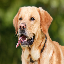

In [4]:
test_image

**Step 3.2 :** Changing the dimensions of the test image from 64x64(2D) to 64x64x3(3D)

In [5]:
test_image = image.img_to_array(test_image)

**Step 3.3 :** Changing the above image to 4 dimension
* The predict method expects 4 dimensions and we have only 3
* It can't take a single input i.e image
* It only accepts inputs in a batch
* Hence the 4th dimension is the batch, even if the batch has 1 input, the inputs must be in a batch

In [6]:
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

(1, 64, 64, 3)

**Step 3.4 :** Prediction

In [7]:
result = cnn_classifier.predict(test_image)
print(result) # to check the result

[[1.]]


**Step 3.5 :** Checking the indices
* We don't know from the result obtained above whether 1 stands for cat or a dog
* Hence we use the attribute called `class_indices`, which gives us the info about the index assigned to each class

In [14]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

This result tells us that it identified the **dog** correctly

In [15]:
result.shape

(1, 1)

**Step 3.6 :** Additional step **(Making result more explanatory)**
* We extract the 1st element from `result` as it is a 2d array to identify whether the image is of a cat or a dog
* Then we assign them with their respective class

In [16]:
if result[0][0] == 1:
    prediction = 'Dog'
else:
    prediction = 'Cat'
    
# printing the result
print(f"The CNN identified the newly loaded image as {prediction}")

The CNN identified the newly loaded image as Dog


Checking whether it identifies the **cat** as well

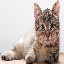

In [17]:
test_image2 = image.load_img('C:/Users/Rohit/Desktop/Data Science/Deep Learning/Datasets/single_prediction/cat.jpg',
                            target_size=(64, 64))
test_image2

In [18]:
test_image2 = image.img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2, axis=0)
result2 = cnn_classifier.predict(test_image2)

if result2[0][0] == 1:
    prediction2 = 'Dog'
else:
    prediction2 = 'Cat'

print(f"The CNN identified the newly loaded image as {prediction2}")

The CNN identified the newly loaded image as Cat
